In [1]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 51.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 72.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.9 MB/s eta 0:00:00:00:0100:

In [2]:
# loading required libs

import tensorflow as tf
import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2023-12-01 10:09:30.424799: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 10:09:30.488821: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 10:09:30.488892: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 10:09:30.490362: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 10:09:30.499032: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 10:09:30.500110: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [57]:
# Checking the version of TensorFlow and Keras

print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")

TensorFlow Version: 2.15.0
Keras Version: 2.15.0


In [58]:
df =  pd.read_csv("wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


## EDA 

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [60]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [61]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [62]:
""" from the above analysis we can absorve that there is only one categorical 
col that is needed to be encoded for the model training 
"""

' from the above analysis we can absorve that there is only one categorical \ncol that is needed to be encoded for the model training \n'

In [63]:
df.quality.value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [64]:
# lets encoded the quality col

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df.quality = encoder.fit_transform(df.quality)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [65]:
df.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

Text(0.5, 1.0, 'Quality')

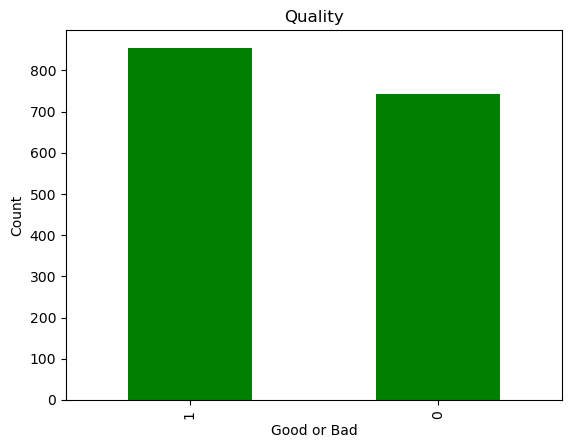

In [66]:
df.quality.value_counts().plot(kind='bar',color='green')
plt.xlabel("Good or Bad")
plt.ylabel("Count")
plt.title("Quality")

<AxesSubplot: >

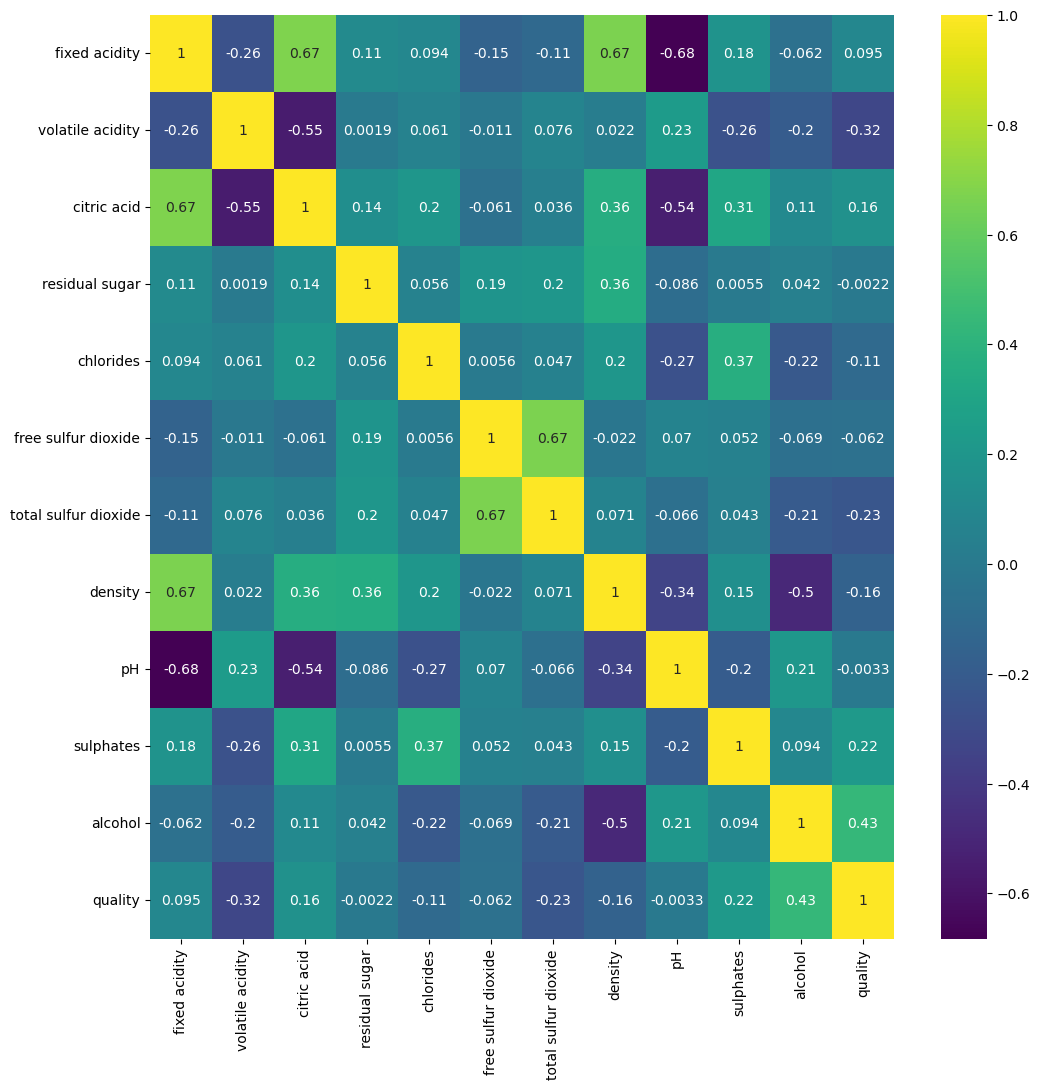

In [67]:
#Plotting the correlation matrix
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='viridis',annot=True)

In [68]:
# saprating the target and independent variable 

x = df.drop("quality", axis = 1)
y = df.quality

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
## splitting the data into train_full and test 

x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, random_state=42)

In [71]:
## splitting the data into train and validation

x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)  

In [72]:
print(x_train_full.shape)
print(y_train_full.shape)

print(x_test.shape)
print(y_test.shape)

print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)


(1199, 11)
(1199,)
(400, 11)
(400,)
(899, 11)
(899,)
(300, 11)
(300,)


In [73]:
# lets scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_valid_scaled = scaler.fit_transform(x_valid)


In [74]:
# Creating the lay out

LAYERS = [tf.keras.layers.Flatten(input_shape=x_train.shape[1:], name="inputLayer"), 
          tf.keras.layers.Dense(30, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(10, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(2, activation="sigmoid", name="outputLayer")
          ]

In [75]:
# Defining model
model_clf = tf.keras.models.Sequential(LAYERS)

In [76]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 11)                0         
                                                                 
 hiddenLayer1 (Dense)        (None, 30)                360       
                                                                 
 hiddenLayer2 (Dense)        (None, 10)                310       
                                                                 
 outputLayer (Dense)         (None, 2)                 22        
                                                                 
Total params: 692 (2.70 KB)
Trainable params: 692 (2.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
## model compilation 

LOSS = "sparse_categorical_crossentropy"
# OPTIMIZER = "ADAM"
OPTIMIZER = tf.keras.optimizers.Adam()
METRICS = ["accuracy"]

model_clf.compile( loss = LOSS,
                  optimizer= OPTIMIZER,
                  metrics=METRICS)

In [78]:
## Obtaining the model's parameters (weights and biases).

layer1 = model_clf.layers[1]

In [79]:
weights, biases = layer1.get_weights()

In [80]:
print("shape\n",weights.shape, "\n")
weights

shape
 (11, 30) 



array([[ 4.19086516e-02, -3.70658875e-01, -1.39139444e-01,
        -1.73114538e-02,  2.29271024e-01,  1.63724750e-01,
        -9.99462605e-03,  9.65403616e-02,  2.46182352e-01,
         3.17731649e-01,  3.11210960e-01, -1.72005549e-01,
        -2.24847078e-01,  7.96791017e-02,  9.23891068e-02,
         1.37098134e-02, -3.64753097e-01,  2.96771526e-04,
        -2.30603814e-01, -1.93152323e-01, -1.41420871e-01,
        -2.89823830e-01, -2.77334273e-01,  3.44562083e-01,
        -2.57471740e-01,  1.30148143e-01,  1.76699013e-01,
         1.70773268e-03, -2.02836394e-01, -2.81444788e-02],
       [-1.47510976e-01,  1.33935660e-01,  1.81686729e-01,
        -2.97847688e-01, -2.52975285e-01,  2.48954862e-01,
        -1.57002613e-01, -2.31659710e-01, -1.08918548e-03,
        -3.35320801e-01, -3.37407976e-01,  3.44275624e-01,
        -3.18053216e-01,  3.49469990e-01, -1.64851889e-01,
         1.18371814e-01, -1.77638531e-01,  1.60587162e-01,
        -9.05108154e-02,  1.28977925e-01, -1.76647007e-

In [1]:
print("shape\n",biases.shape, "\n")
biases

NameError: name 'biases' is not defined

In [102]:
# tenserflow callback function

import time
import os

def get_log_path():
    log_dir = "logs"
    file_name = time.strftime("log_%Y_%m_%d_%H_%M_%S")
    log_path = os.path.join(log_dir, file_name)
    print(f"Saving logs at {log_path}")
    return log_path


In [103]:
path = get_log_path()

tb_cb = tf.keras.callbacks.TensorBoard(log_dir = path)

Saving logs at logs/log_2023_12_01_10_18_45


In [104]:
## Early stopping callback function

es_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [105]:
# model checkpointing

CKPT_path = "callback_fun_ckpt_model.h5"

cp_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [106]:
## model training 

EPOCHS = 10
VALIDATION_SET = [x_valid_scaled, y_valid]
CALLBACB_FUNC = [tb_cb, es_cb, cp_cb]

history = model_clf.fit(x_train_scaled, y_train,
                        epochs=EPOCHS,
                        validation_data=VALIDATION_SET,
                        callbacks= CALLBACB_FUNC
                       )

Epoch 1/10
29/29 [==============================] - 0s 6ms/step - loss: 0.4727 - accuracy: 0.7798 - val_loss: 0.5667 - val_accuracy: 0.7433
Epoch 2/10
29/29 [==============================] - 0s 4ms/step - loss: 0.4695 - accuracy: 0.7775 - val_loss: 0.5693 - val_accuracy: 0.7367
Epoch 3/10
 1/29 [>.............................] - ETA: 0s - loss: 0.3218 - accuracy: 0.9062

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 4ms/step - loss: 0.4670 - accuracy: 0.7775 - val_loss: 0.5685 - val_accuracy: 0.7433
Epoch 4/10
29/29 [==============================] - 0s 4ms/step - loss: 0.4633 - accuracy: 0.7831 - val_loss: 0.5657 - val_accuracy: 0.7433
Epoch 5/10
29/29 [==============================] - 0s 4ms/step - loss: 0.4608 - accuracy: 0.7842 - val_loss: 0.5709 - val_accuracy: 0.7433
Epoch 6/10
29/29 [==============================] - 0s 4ms/step - loss: 0.4592 - accuracy: 0.7831 - val_loss: 0.5650 - val_accuracy: 0.7400
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.7798 - val_loss: 0.5815 - val_accuracy: 0.7433
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 0.4544 - accuracy: 0.7853 - val_loss: 0.5778 - val_accuracy: 0.7467
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.7853 - val_loss: 0.5715 - val_accuracy: 0.7500
Epoch 10/10
29/29 [============

In [116]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 29}

In [117]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.472678,0.779755,0.566739,0.743333
1,0.469498,0.777531,0.569338,0.736667
2,0.467035,0.777531,0.568492,0.743333
3,0.463319,0.783092,0.565698,0.743333
4,0.460754,0.784205,0.570883,0.743333
5,0.459227,0.783092,0.564981,0.740000
6,0.458541,0.779755,0.581480,0.743333
7,0.454376,0.785317,0.577782,0.746667
8,0.450164,0.785317,0.571455,0.750000
9,0.447997,0.794216,0.572224,0.746667


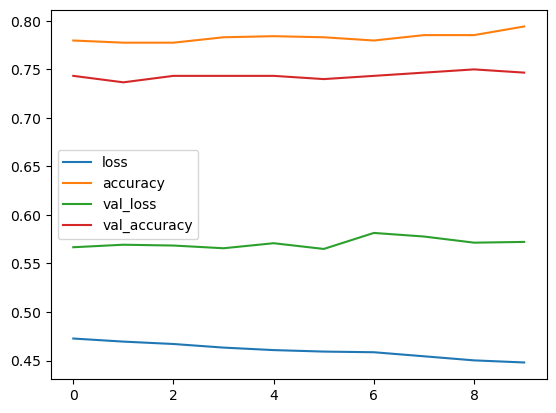

In [118]:
pd.DataFrame(history.history).plot();

In [119]:
# Model Evaluation on whole test data

model_clf.evaluate(x_test_scaled, y_test)

13/13 [==============================] - 0s 1ms/step - loss: 0.5157 - accuracy: 0.7175


[0.5157495737075806, 0.7174999713897705]

In [111]:
# prediction for new value 

x_new = x_test_scaled[:5]
actual = y_test[:5]

y_prob = model_clf.predict(x_new)

y_pred = np.argmax(y_prob, axis = -1)

1/1 [==============================] - 0s 28ms/step


/tmp/ipykernel_123/4270786401.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  actual = y_test[:5]


In [112]:
actual

803     1
124     0
350     1
682     0
1326    1
Name: quality, dtype: int64

In [113]:
y_pred

array([0, 0, 1, 0, 1])

In [114]:
## performance matrix

from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(actual, y_pred))

[[2 0]
 [1 2]]


In [115]:
print(f"Accuracy Score : {accuracy_score(actual, y_pred)*100:.2f}%")

Accuracy Score : 80.00%
